In [61]:
import ee
# Earth Engine setup
# Nearly every example uses the Earth Engine API so you'll need to import the API, authenticate, and initialize.
ee.Authenticate()
ee.Initialize()
print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())

ModuleNotFoundError: No module named 'ee'

- `sample()`: samples the image (does NOT work for an `ee.ImageCollection` — we'll talk about sampling an `ee.ImageCollection` later) according to a given geometry and a scale (in meters) of the projection to sample in. It returns an `ee.FeatureCollection`.
- `first()`: returns the first entry of the collection,
- `get()`: to select the appropriate band of your Image/Collection,
- `getInfo()`: evaluates server-side expression graph and transfers result to client.

In [ ]:
# Initialize the Earth Engine module.
ee.Initialize()

# Print metadata for a DEM dataset.
print(ee.Image('USGS/SRTMGL1_003').getInfo())

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [1296001, 417601], 'crs': 'EPSG:4326', 'crs_transform': [0.0002777777777777778, 0, -180.0001388888889, 0, -0.0002777777777777778, 60.00013888888889]}], 'id': 'USGS/SRTMGL1_003', 'version': 1641990767055141, 'properties': {'system:visualization_0_min': '0.0', 'type_name': 'Image', 'keywords': ['dem', 'elevation', 'geophysical', 'nasa', 'srtm', 'topography', 'usgs'], 'thumb': 'https://mw1.google.com/ges/dd/images/SRTM90_V4_thumb.png', 'description': '<p>The Shuttle Radar Topography Mission (SRTM, see <a href="https://onlinelibrary.wiley.com/doi/10.1029/2005RG000183/full">Farr\net al. 2007</a>)\ndigital elevation data is an international research effort that\nobtained digital elevation models on a near-global scale. This\nSRTM V3 product (SRTM Plus) is provided by NASA JPL\nat a resolution of 1 arc-second (approximately 30m).</p><p>This dataset

In [ ]:
# Load a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Print image object WITHOUT call to getInfo(); prints serialized request instructions.
print(img)

# Print image object WITH call to getInfo(); prints image metadata.
print(img.getInfo())

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913"
      }
    }
  }
})
{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 27

# Folium interactive map display

In [ ]:
import folium
from folium import plugins

# Define a method for displaying Earth Engine image tiles on a folium map.
def add_ee_layer(self, ee_object, vis_params, name):
    
    try:    
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):    
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):    
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):    
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):  
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
    
    except:
        print("Could not display {}".format(name))
    
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

## custom basemaps

In [ ]:
# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    ),
    'OpenTopoMap':folium.TileLayer(
        tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
        attr = 'OpenTopoMap',
        name = 'OpenTopoMap',
        overlay = True,
        control = True
    )
}

# Test API

In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


# Use IPython.display.module

In [ ]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

## Use Folium to display

In [ ]:
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m

# Get a feature collection of administrative boundaries.
countries = ee.FeatureCollection('FAO/GAUL/2015/level0').select('ADM0_NAME')

# Filter the feature collection to subset France.
india = countries.filter(ee.Filter.eq('ADM0_NAME', 'India'))

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')
# add india boundaries
my_map.add_ee_layer(india, {}, 'India')
# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Add fullscreen button
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# Updating different elevation mask

In [ ]:
dem = ee.Image('USGS/SRTMGL1_003') #NASA SRTM Digital Elevation 30m
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)
basemaps['OpenTopoMap'].add_to(my_map)

# Add the elevation model to the map object.
# Make pixels with elevation below sea level transparent.
# .gt(): Returns 1 iff the first value is greater than the second.
# .updateMask(): Updates an image's mask at all positions where the existing mask is not zero. The output image retains the metadata and footprint of the input image.
mask = dem.gt(50) # DEM > 50, 1,0 --> apply mas
my_map.add_ee_layer(dem.updateMask(mask), vis_params, 'DEM_50')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))
my_map.add_ee_layer(flood_map, vis_params_flood, 'flood')
# my_map.add_ee_layer(dem.And(DEM_50), vis_params_flood, 'Flood')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Add fullscreen button
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# A complete example

- DEM
- Global Surface Water
- Boundary layer

In [ ]:
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[40.33, -99.42], zoom_start=4, height=500)

# Add custom basemaps
basemaps['Google Maps'].add_to(my_map)
basemaps['Google Satellite Hybrid'].add_to(my_map)

# Add the elevation model to the map object.
# Make pixels with elevation below sea level transparent.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display ee.Image
dataset = ee.Image('JRC/GSW1_1/GlobalSurfaceWater')
occurrence = dataset.select('occurrence');
occurrenceVis = {'min': 0.0, 'max': 100.0, 'palette': ['ffffff', 'ffbbbb', '0000ff']}
my_map.add_ee_layer(occurrence, occurrenceVis, 'JRC Surface Water')

# Display ee.Geometry
holePoly = ee.Geometry.Polygon(coords = [[[-35, -10], [-35, 10], [35, 10], [35, -10], [-35, -10]]],
                               proj= 'EPSG:4326',
                               geodesic = True,
                               maxError= 1.,
                               evenOdd = False)
my_map.add_ee_layer(holePoly, {}, 'Polygon')

# Display ee.FeatureCollection
fc = ee.FeatureCollection('TIGER/2018/States')
my_map.add_ee_layer(fc, {}, 'US States')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)

# Export image

In [ ]:
task = ee.batch.Export.image.toDrive(image=dem,
                                     description='SRTM_DEM',
                                     scale=30,
                                     fileNamePrefix='SRTM_DEM',
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF',
                                     maxPixels= 1e12)
task.start()

In [ ]:
task.status()

{'state': 'FAILED',
 'description': 'SRTM_DEM',
 'creation_timestamp_ms': 1687397062326,
 'update_timestamp_ms': 1687400572518,
 'start_timestamp_ms': 1687397068264,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'error_message': 'Not enough space in Google Drive (need 121GB for this export).',
 'id': '6VW7UHK3PXWT7ZKSCXDXAJYI',
 'name': 'projects/earthengine-legacy/operations/6VW7UHK3PXWT7ZKSCXDXAJYI'}

# Export as tiles

In [ ]:
ee.batch.Export.map.toCloudStorage(image=flood_map,
                                     description='flood_map_50m',
                                     bucket=bucket_name,
                                     fileNamePrefix='flood_map_50m',
                                     fileFormat= 'auto',
                                     maxZoom=13,
                                    writePublicTiles= True,
                                    mapsApiKey=API_key,
                                    bucketCorsUris=['http://127.0.0.1:5000/test'])

<Task EXPORT_TILES: flood_map_50m (UNSUBMITTED)>

# Use GEEMAP

In [ ]:
import ee
import geemap
import os

In [ ]:
Map = geemap.Map(toolbar_ctrl=True, layer_ctrl=True)
Map.add_basemap('OpenTopoMap')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
# landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
# landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
# states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

vis_params_sw = {
  'bands': ['occurrence'],
  'min': 0.0,
  'max': 100.0,
  'palette': ['ffffff', 'ffbbbb', '0000ff']
};

# Add Earth Engine layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
flood_level = 50
mask = dem.gt(flood_level) # DEM > 50, 1,0 --> apply mas
Map.addLayer(dem.updateMask(mask), vis_params, 'DEM_50')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))

Map.addLayer(flood_map, vis_params_flood, f'Flood_{flood_level}', True, 0.5)

# global surface water
dataset = ee.Image('JRC/GSW1_1/GlobalSurfaceWater')
Map.addLayer(dataset, vis_params_sw, f'global surface water', True, 0.5)

# clip flood map to country boundary
country_boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
flood_map_clipped = flood_map.clip(country_boundaries)
Map.addLayer(flood_map_clipped, vis_params_flood, f'Flood_clipped_{flood_level}', True, 0.5)
# Convert the flood layers to vectors

# # Load a Japan boundary from the Large Scale International Boundary dataset.
# country_boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

# Map.addLayer(country_boundaries, {}, 'country_boundaries')
vectors = flood_map_clipped.reduceToVectors(
  geometry = country_boundaries,
  crs = dem.projection(),
  scale = 1000,
  geometryType= 'polygon',
  eightConnected= False,
  labelProperty= 'zone',
  reducer= ee.Reducer.mean()
)

# # Make a display image for the vectors, add it to the map.
display = ee.Image(0).updateMask(0).paint(vectors, '000000', 3)
Map.addLayer(display, {'palette': '000000'}, 'vectors')

EEException: Collection.geometry: Geometry has too many edges (3970390 > 2000000).

In [ ]:
Map.to_html(filename=os.path.join('templates','floodmap_gee.html'), title='My Map', width='100%', height='880px')

In [ ]:
import ee
import geemap.foliumap as geemap

In [ ]:
params = {
    'width': 4.0,
    'height': 0.3,
    'vmin': 0,
    'vmax': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],#'terrain',
    'label': 'Elevation (m)',
    'orientation': 'horizontal',
    'transparent': False,
}

'c:\\Users\\PAKHUIYING\\Documents\\Programming\\SIHTeamUniform\\colorbar.png'

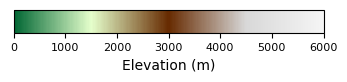

In [ ]:
geemap.save_colorbar('colorbar.png', **params)


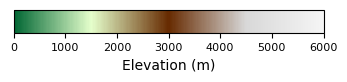

In [ ]:
Map = geemap.Map()
# add topo
dem = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 6000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
# Map.addLayer(dem, vis_params, 'SRTM')

Map.add_colormap(position=(55, 5), **params)

vis_params_flood = {
  'min': 0,
  'max': 50,
  'opacity':0.5,
  'palette': ['0000ff']}

# Add Earth Engine layers to Map
flood_level = 50
mask = dem.gt(flood_level) # DEM > 50, 1,0 --> apply mas
Map.addLayer(dem.updateMask(mask), vis_params, f'DEM_{flood_level}')
# eq():  The type of the output pixels is boolean.
# where mask equals to 0 --> DEM<50, then mask = 1
flood_map = dem.updateMask(mask.eq(0))

Map.addLayer(flood_map, vis_params_flood, f'Flood_{flood_level}', True, 0.5)

Map

In [ ]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/mickeykedia/9d9144072c5f637c26995569dd347614/raw/b65134846607235adf4ad6498713deed77d3b4b5/ward_level_collated.csv')
df_cropped = df.loc[:,['Ward_Alphabet','Ward_Names','TOT_P_DEN']].set_index(['Ward_Alphabet'])
df_cropped.to_csv('mumbai_popn_density.csv')
df_dict = df_cropped.to_dict('index')

In [ ]:
df_dict

{'A': {'Ward_Names': 'Colaba', 'TOT_P_DEN': 14801.12},
 'B': {'Ward_Names': 'Sandhurst Road', 'TOT_P_DEN': 50916.0},
 'C': {'Ward_Names': 'Marine Lines', 'TOT_P_DEN': 92311.67},
 'D': {'Ward_Names': 'Grant Road', 'TOT_P_DEN': 52555.45},
 'E': {'Ward_Names': 'Byculla', 'TOT_P_DEN': 53146.76},
 'F/N': {'Ward_Names': 'Matunga', 'TOT_P_DEN': 40694.92},
 'F/S': {'Ward_Names': 'Parel', 'TOT_P_DEN': 25783.71},
 'G/N': {'Ward_Names': 'Dadar/Plaza', 'TOT_P_DEN': 41510.88},
 'G/S': {'Ward_Names': 'Elphinstone', 'TOT_P_DEN': 59903.9},
 'H/E': {'Ward_Names': 'Khar/Santacruz', 'TOT_P_DEN': 22783.78},
 'H/W': {'Ward_Names': 'Bandra', 'TOT_P_DEN': 48037.84},
 'K/E': {'Ward_Names': 'Andheri (East)', 'TOT_P_DEN': 33221.17},
 'K/W': {'Ward_Names': 'Andheri (West)', 'TOT_P_DEN': 31995.21},
 'L': {'Ward_Names': 'Kurla', 'TOT_P_DEN': 56743.71},
 'M/E': {'Ward_Names': 'Chembur', 'TOT_P_DEN': 24852.92},
 'M/W': {'Ward_Names': 'Chembur (West)', 'TOT_P_DEN': 21122.72},
 'N': {'Ward_Names': 'Ghatkopar', 'TOT_P_

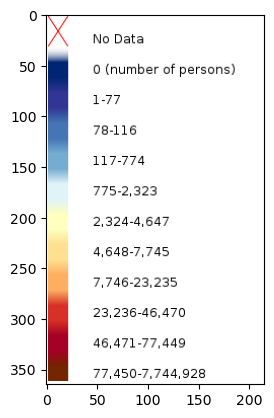

In [1]:
import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve(
  'https://www.floodmap.net/getFMTile.ashx?x=6&y=4&z=3&e=0',
   "tile1.png")
  
img1 = np.asarray(Image.open("tile1.png"))

# ssp = 'https://sedac.ciesin.columbia.edu/geoserver/wms?service=WMS&request=GetMap&layers=popdynamics%3Apopdynamics-pop-projection-ssp-2010-2100_ssp5-2100-total-population%2Ccartographic%3A00-global-labels&styles=&format=image%2Fpng&transparent=true&version=1.1.1&width=256&height=256&srs=EPSG%3A3857&bbox=10018754.171394622,-5009377.085697311,15028131.257091936,0'
ssp = 'https://sedac.ciesin.columbia.edu/geoserver/wms?service=WMS&request=GetMap&layers=popdynamics%3Apopdynamics-pop-projection-ssp-2010-2100_ssp5-2100-total-population%2Ccartographic%3A00-global-labels&styles=&format=image%2Fpng&transparent=true&version=1.1.1&width=256&height=256&srs=EPSG%3A3857&bbox=10018754,-5009377,15028131,0'

urllib.request.urlretrieve(
  ssp, "tile2.png")
img2 = np.asarray(Image.open("tile2.png"))

urllib.request.urlretrieve(
  'https://sedac.ciesin.columbia.edu/geoserver/ows?service=WMS&request=GetLegendGraphic&format=image/png&width=20&height=20&layer=popdynamics:popdynamics-pop-projection-ssp-2010-2100_ssp1-2050-total-population&', "legend.png")
legend = np.asarray(Image.open("legend.png"))
plt.figure()
plt.imshow(legend)
plt.show()

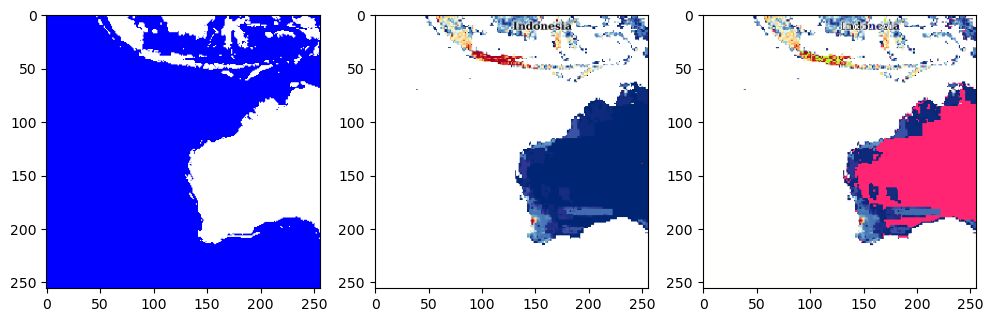

In [2]:
fig, axes = plt.subplots(1,3,figsize=(12,5))
  
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(img1+img2)
plt.show()

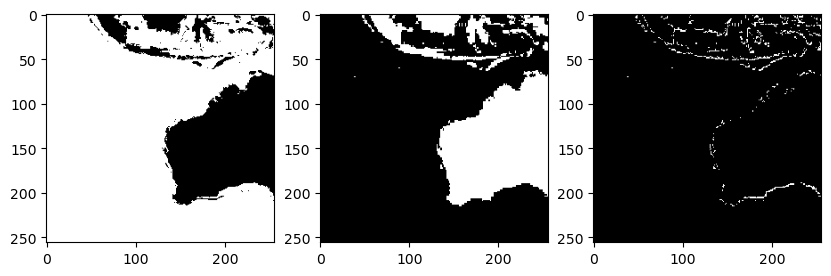

(256, 256, 4)


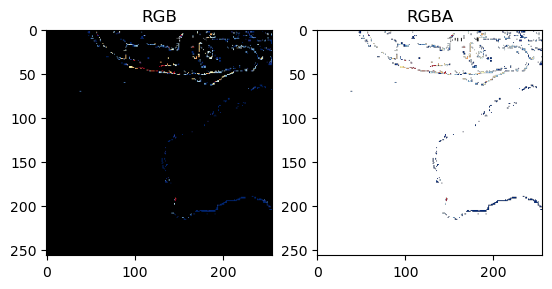

In [3]:
def get_flooded_extent(flood_img,wms_img):
    assert flood_img.shape[-1] == 4 and wms_img.shape[-1] == 4 #check that its img with alpha channel
    mask_list = [flood_img[:,:,-1],wms_img[:,:,-1]]
    mask_list = [(m/255).astype(np.uint8) for m in mask_list]
    # flood_img_mask = flood_img[:,:,-1]/255
    # wms_img_mask = wms_img[:,:,-1]/255
    fig, axes = plt.subplots(1,3,figsize=(10,5))
    for i,m in enumerate(mask_list):
        axes[i].imshow(m,cmap='gray')
    # axes[0].imshow(flood_img[:,:,-1],cmap='gray')
    # axes[1].imshow(wms_img[:,:,-1],cmap='gray')
    
    flooded_extent_mask = np.multiply(*mask_list)
    axes[2].imshow(flooded_extent_mask,cmap='gray')
    plt.show()

    fig, axes = plt.subplots(1,2)
    flooded_extent_mask = np.repeat(flooded_extent_mask[:,:,np.newaxis],4,axis=2)
    print(flooded_extent_mask.shape)
    flooded_extent = flooded_extent_mask*wms_img#[:,:,:3]
    # flooded_extent_alpha = np.concatenate([flooded_extent,flooded_extent_mask[:,:,0]],axis=2)
    axes[0].imshow(flooded_extent[:,:,:3])
    axes[0].set_title('RGB')
    axes[1].imshow(flooded_extent)
    axes[1].set_title('RGBA')
    
    plt.show()

    return flooded_extent
flooded_extent = get_flooded_extent(img1,img2)

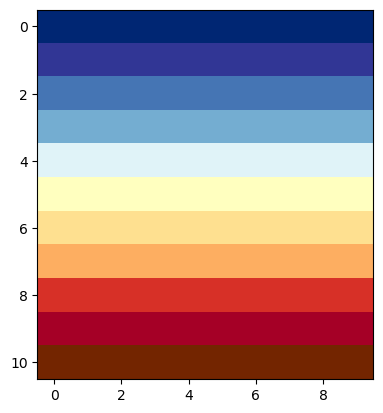

In [27]:
import pickle
with open(r'data\ssp5-2100.ob','rb') as f:
    legend_dict = pickle.load(f)

legend_dict_px_arr = np.vstack([legend_dict[i]['pixel_val'] for i in range(len(legend_dict))])
plt.imshow(np.tile(legend_dict_px_arr.reshape(-1,1,3),(1,10,1)))

In [44]:
with open(r'data\ssp5-2100.ob','rb') as f:
    legend_dict = pickle.load(f)

def calculate_popn_affected(flooded_extent,legend_dict):
    """ 
    :param legend_dict (dict): maps pixel values to popn
    """
    # use dot matrix to quickly calculate which color palette has the highest dot product value instead of using for loops
    flooded_extent = flooded_extent[:,:,:3]
    px_arr, counts = np.unique(flooded_extent.reshape(-1, flooded_extent.shape[2]), axis=0,return_counts=True)
    popn_total_count = 0
    legend_dict_px_arr = np.vstack([legend_dict[i]['pixel_val'] for i in range(len(legend_dict))])
    min_popn_legend = np.array([legend_dict[i]['min'] for i in range(len(legend_dict))]) # min popn count for legend 0 to 11
    max_popn_legend = np.array([legend_dict[i]['max'] for i in range(len(legend_dict))]) # max popn count for legend 0 to 11
    legend_dict_px_arr_norm = legend_dict_px_arr/np.tile(np.linalg.norm(legend_dict_px_arr,axis=1).reshape(-1,1),(1,3))
    px_arr_norm = px_arr/np.tile(np.linalg.norm(px_arr,axis=1).reshape(-1,1),(1,3))
    if np.sum(px_arr[1,:]) == 0:
        px_arr_norm = px_arr_norm[1:,:] # remove the first row because row 0 is [0,0,0] --> normalisation will lead to NAs
        counts = counts[1:]
    dot_pdt = np.dot(px_arr_norm,legend_dict_px_arr_norm.T)
    legend_match = np.argmax(dot_pdt,axis=1) #to see which color palette best matches legend color

    legend_count = np.bincount(legend_match,weights = counts) # frequency of pixels for each legend, outputs the length == max(legend_match), e.g. if 9th legend is the highest, length == 10
    # legend_count outputs the pixel count for each legend
    n_legend_detected = legend_count.shape[0]
    # multiply legend_count by popn count as each legend corresponds to a different population count
    min_popn = np.sum(legend_count * min_popn_legend[:n_legend_detected])
    max_popn = np.sum(legend_count * max_popn_legend[:n_legend_detected])
    return min_popn, max_popn

calculate_popn_affected(flooded_extent,legend_dict)

c:\Users\PAKHUIYING\anaconda3\envs\micasense_clone\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


(3140464.0, 6237371.0)

In [181]:
ssp_json = {'ssp1':{2050: [0,1,78,117,775,2324,4648,7746,23236,46471,77450,7744928],
                    2100: [0,1,98,146,967,2899,5796,9659,28976,57952,96585,9658445]},
            'ssp2':{2050: [0,1,73,110,725,2173,4346,7242,21724,43448,72412,7241105],
                    2100: [0,1,101,151,1002,3004,6008,10012,30034,60067,100111,10011008]},
            'ssp3':{2050: [0,1,69,103,681,2042,4082,6803,20408,40815,68025,6802362],
                    2100: [0,1,102,153,1013,3037,6072,10120,300358,60714,101190,10118875]},
            'ssp4':{2050: [0,1,93,140,926,2776,5550,9250,27748,55496,92492,9249123],
                    2100: [0,1,166,248,1648,4943,9886,16476,49426,98850,164749]},
            'ssp5':{2050: [0,1,78,117,771,2311,4621,7702,23103,46204,77006,7700545],
                    2100: [0,1,95,142,943,2828,5656,9425,28274,56547,94244,9424339]}
            }


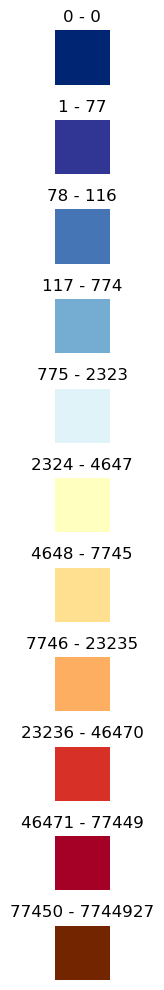

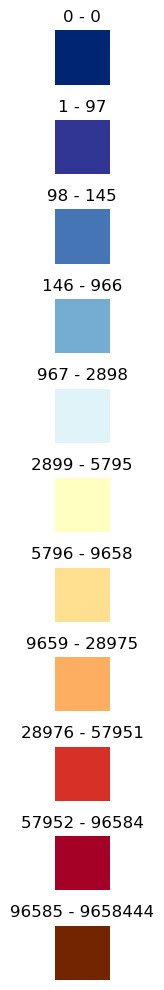

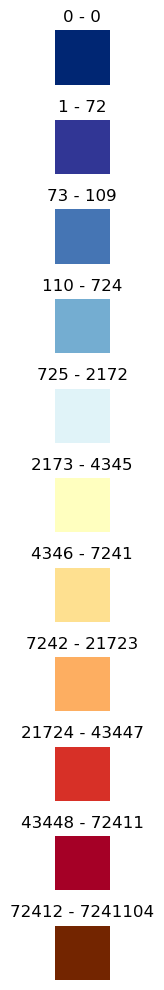

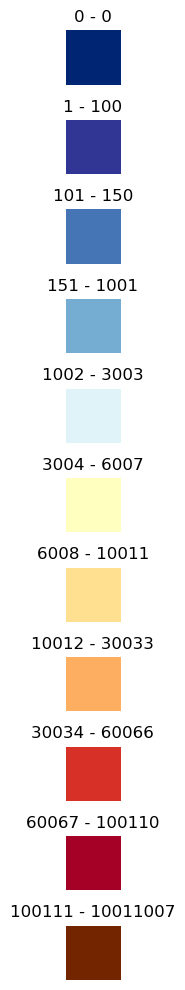

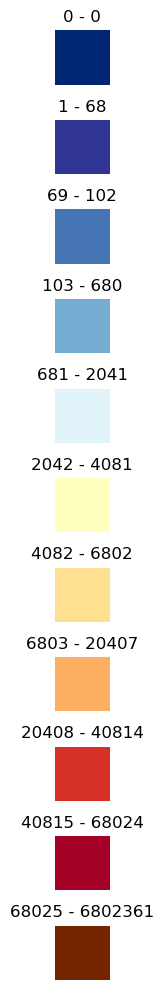

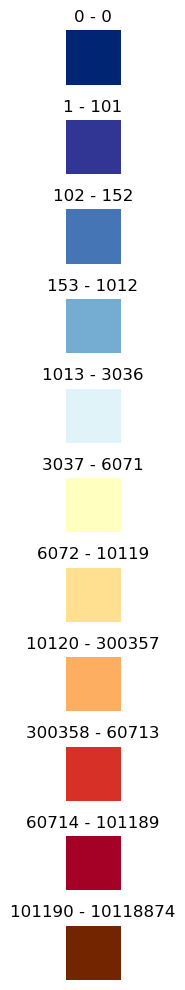

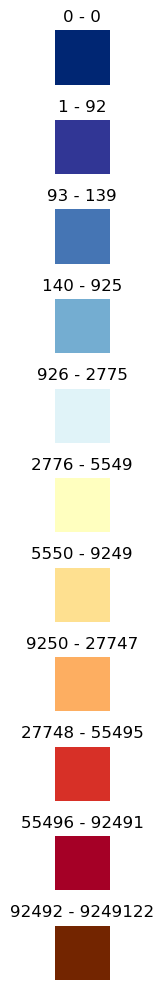

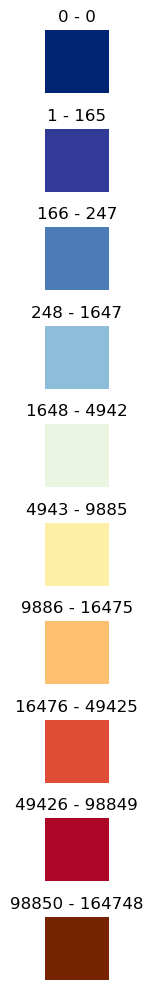

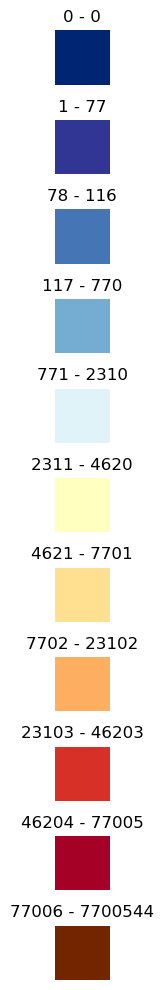

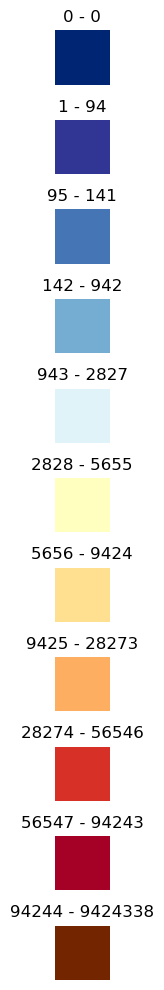

In [183]:
import pickle
import os
def legend_cmap(legend,ssp_value,save_dir=None):
    legend_c = legend[45:365,7:20,:]
    breaks = len(ssp_value)
    color_range = np.linspace(0,legend_c.shape[0],breaks,dtype=int)
    color_list = []
    fig, axes = plt.subplots(breaks-1,1,figsize=(3,10))
    color_dict = dict()
    for i,ax in zip(range(len(color_range)-1),axes.flatten()):
        legend_slice = legend_c[color_range[i]:color_range[i+1],:,:]
        legend_slice = legend_slice[10:20,:,:]
        legend_slice_mean = np.mean(legend_slice,axis=(0,1)).astype(np.uint8)
        color_list.append(legend_slice_mean)
        ax.imshow(np.tile(legend_slice_mean.reshape(1,1,3),(10,10,1)))
        ax.axis('off')
        ax.set_title(f'{ssp_value[i]} - {ssp_value[i+1]-1}')
        color_dict[i] = {'pixel_val':legend_slice_mean,'min':ssp_value[i],'max':ssp_value[i+1]-1}
    plt.tight_layout()
    plt.show()

    if save_dir is not None:
        fig.savefig(f'{save_dir}.png')
        with open(f'{save_dir}.ob','wb') as f:
            pickle.dump(color_dict,f)
    
    return color_dict


for ssp_type, year_d in ssp_json.items():
    for ssp_year, values in year_d.items():
        legend_cmap(legend,values,os.path.join(r'data',f'{ssp_type}-{ssp_year}'))


In [175]:
ssp_json = {'ssp1':{2050: [0,1,78,117,775,2324,4648,7746,23236,46471,77450,7744928],
                    2100: [0,1,98,146,967,2899,5796,9659,28976,57952,96585,9658445]},
            'ssp2':{2050: [0,1,73,110,725,2173,4346,7242,21724,43448,72412,7241105],
                    2100: [0,1,101,151,1002,3004,6008,10012,30034,60067,100111,10011008]},
            'ssp3':{2050: [0,1,69,103,681,2042,4082,6803,20408,40815,68025,6802362],
                    2100: [0,1,102,153,1013,3037,6072,10120,300358,60714,101190,10118875]},
            'ssp4':{2050: [0,1,93,140,926,2776,5550,9250,27748,55496,92492,9249123],
                    2100: [0,1,166,248,1648,4943,9886,16476,49426,98850,164749]},
            'ssp5':{2050: [0,1,78,117,771,2311,4621,7702,23103,46204,77006,7700545],
                    2100: [0,1,95,142,943,2828,5656,9425,28274,56547,94244,9424339]}
            }
len(ssp_json['ssp1'][2050])
# with open('data/ssp_json.ob','rb') as f:
#     ssp_json = pickle.load(f)
# ssp_json

12

In [100]:
def map_legend_to_values(legend_c_arr,values, plot=False):
    values = values[1:]
    n = legend_c_arr.shape[0]
    def interpolate(inp, fi):
        i, f = int(fi // 1), fi % 1  # Split floating-point index into whole & fractional parts.
        j = i+1 if f > 0 else i  # Avoid index error.
        return (1-f) * inp[i] + f * inp[j]
    delta = (len(values)-1) / (n-1)
    outp = [interpolate(values, i*delta) for i in range(n)]
    if plot is True:
        fig, ax = plt.subplots()
        ax.imshow(np.tile(legend_c_arr,(1,10,1)))
        labels = ax.get_yticks()  # Get the current locations and labels.
        step = 10
        ticks = np.arange(0,legend_c_arr.shape[0],step)
        labels = outp[::step]
        ax.set_yticks(ticks,[f'{l:.2f}' for l in labels])
        plt.show()
    
    assert n == len(outp)
    return legend_c_arr,outp

for ssp_type, year_d in ssp_json.items():
    for ssp_year, values in year_d.items():
        _, popn = map_legend_to_values(legend_c_arr,values)
        with open(f'data/popn_{ssp_type}_{ssp_year}.ob','wb') as f:
            pickle.dump(legend_hash(legend_c_arr,popn),f)

In [102]:
with open(r'data\popn_ssp5_2100.ob','rb') as f:
    ssp_json = pickle.load(f)
ssp_json

{'255_255_255': 0.0,
 '252_252_253': 0.06666666666666667,
 '247_248_249': 0.13333333333333333,
 '240_242_245': 0.2,
 '231_234_239': 0.26666666666666666,
 '220_224_233': 0.3333333333333333,
 '207_213_226': 0.4,
 '193_201_217': 0.4666666666666667,
 '176_186_208': 0.5333333333333333,
 '157_170_198': 0.6,
 '136_152_186': 0.6666666666666666,
 '113_133_174': 0.7333333333333333,
 '88_112_161': 0.8,
 '61_89_147': 0.8666666666666667,
 '32_65_131': 0.9333333333333333,
 '0_38_115': 1.0,
 '3_39_117': 7.266666666666666,
 '6_40_119': 13.533333333333331,
 '9_41_121': 19.799999999999997,
 '13_42_124': 26.066666666666663,
 '16_43_126': 32.33333333333333,
 '19_44_128': 38.599999999999994,
 '22_45_130': 44.86666666666665,
 '26_46_133': 51.133333333333326,
 '29_47_135': 57.400000000000006,
 '32_48_137': 63.66666666666668,
 '35_49_139': 69.93333333333334,
 '39_50_142': 76.2,
 '42_51_144': 82.46666666666668,
 '45_52_146': 88.73333333333333,
 '49_54_149': 95.0,
 '50_58_151': 98.13333333333333,
 '51_62_153': 

In [15]:
import math
def tile_num_to_lat_lon(zoom, xtile,ytile):
    """
    :param xtile (int): corresponds to google slippy map tile number
    :param ytile (int): corresponds to google slippy map tile number
    returns the coordinate of the upper left (northwest most) point of the tile,
    and the coordinate of the lower right (south east most) point of tile
    in WGS84 datum
    """
    def num2deg(xtile, ytile, zoom):
      n = 1 << zoom #2**zoom
      lon_deg = xtile / n * 360.0 - 180.0
      lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * ytile / n)))
      lat_deg = math.degrees(lat_rad)
      return lat_deg, lon_deg
    
    UL = num2deg(xtile, ytile, zoom)
    LR = num2deg(xtile+1, ytile+1, zoom)
    return UL,LR


coord = tile_num_to_lat_lon(zoom=3, xtile=6,ytile=4)
print(coord)
# bbox=10018754.171394622,-5009377.085697311,15028131.257091936,0

def lat_lon_to_mercator(coord, R =  6378137.0):
    """ 
    :param coord (tuple): where coord = (UL,LR), 
        UL = (lat_deg, lon_deg) of upper left corner of tile
        LR = (lat_deg, lon_deg) of lower right corner of tile
    """
    def lat2y(lat, R=R):
        return math.log(math.tan(math.pi / 4 + math.radians(lat) / 2)) * R

    def lon2x(lon, R=R):
        return math.radians(lon) * R
    
    UL_wgs = coord[0]
    LR_wgs = coord[1]
    UL_merc = (lat2y(UL_wgs[0]),lon2x(UL_wgs[1]))
    LR_merc = (lat2y(LR_wgs[0]),lon2x(LR_wgs[1]))
    return UL_merc, LR_merc

coord_merc = lat_lon_to_mercator(coord)
print(coord_merc)



((0.0, 90.0), (-40.97989806962013, 135.0))
((-7.081154551613622e-10, 10018754.171394622), (-5009377.085697311, 15028131.257091932))
